In [13]:
import os

os.chdir(r"E:\Berbagai Tugas\Tugasss\Semester 5\Konversi DataMining")
print("Working directory:", os.getcwd())
print(os.getcwd())        # lokasi kerja
print(os.listdir())       # list semua file di folder
os.chdir(r"E:\Berbagai Tugas\Tugasss\Semester 5\Konversi DataMining")
print("Working directory:", os.getcwd())

Working directory: E:\Berbagai Tugas\Tugasss\Semester 5\Konversi DataMining
E:\Berbagai Tugas\Tugasss\Semester 5\Konversi DataMining
['.git', 'Data_ACQUISITION.ipynb', 'Data_EDA.ipnyb.ipynb', 'Data_Evaluation.ipynb', 'Data_Modelling.ipynb', 'Data_PREPROCESSING.ipynb', 'Flowchart Alur Penelitian.png', 'Form Nilai Konversi.docx', 'Untitled-1.ipynb', 'Weather_Data_Mentah.csv', 'Weather_Data_PreProcesing.csv']
Working directory: E:\Berbagai Tugas\Tugasss\Semester 5\Konversi DataMining


Dtypes fitur:
 temperature_celsius    float64
humidity_percent         int64
pressure_hpa             int64
wind_speed_ms          float64
hour                     int64
day                      int64
day_of_week             object
dtype: object

Missing value (per kolom):
 temperature_celsius    0
humidity_percent       0
pressure_hpa           0
wind_speed_ms          0
hour                   0
day                    0
day_of_week            0
dtype: int64

Kolom kategorikal yang akan di-encode: ['day_of_week']

Setelah encoding, dtypes:
 temperature_celsius      float64
humidity_percent           int64
pressure_hpa               int64
wind_speed_ms            float64
hour                       int64
day                        int64
day_of_week_Saturday        bool
day_of_week_Sunday          bool
day_of_week_Thursday        bool
day_of_week_Tuesday         bool
day_of_week_Wednesday       bool
dtype: object

Ukuran X: (40, 11)
===== EVALUASI MODEL DECISION TREE =====

Accuracy: 0.62

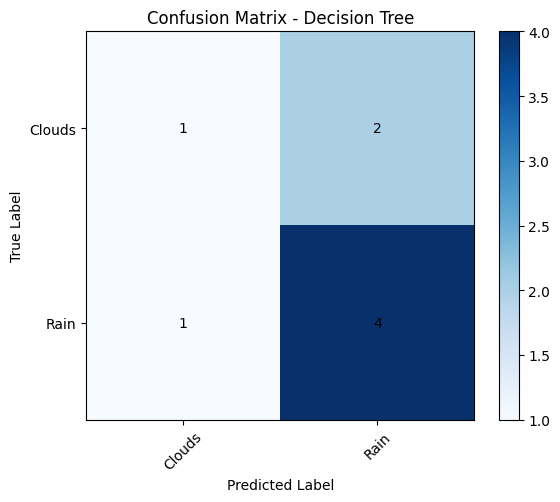


✔ Evaluasi Decision Tree selesai


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# ===============================
# Load Data
# ===============================
df = pd.read_csv("Weather_Data_PreProcesing.csv")

# ===============================
# Pilih fitur numerik + temporal
# ===============================
feature_cols = [
    "temperature_celsius",
    "humidity_percent",
    "pressure_hpa",
    "wind_speed_ms",
    "hour",
    "day",
    "day_of_week"
]

X = df[feature_cols].copy()

# ===============================
# Inspect: tipe kolom & missing
# ===============================
print("Dtypes fitur:\n", X.dtypes)
print("\nMissing value (per kolom):\n", X.isnull().sum())

# ===============================
# Convert categorical features -> numeric
# ===============================
# Temukan kolom non-numeric
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
print("\nKolom kategorikal yang akan di-encode:", cat_cols)

if cat_cols:
    # One-hot encode (drop_first untuk menghindari kolinearitas sederhana)
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# ===============================
# Handle missing numeric (simple, reproducible)
# ===============================
# Isi missing numeric dengan median kolom
if X.isnull().any().any():
    X = X.fillna(X.median())

# Final check
print("\nSetelah encoding, dtypes:\n", X.dtypes)
print("\nUkuran X:", X.shape)

# ===============================
# Target: weather_main (Multiclass)
# ===============================
y = df["weather_main"].copy()  # pastikan nama kolom sesuai file
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ===============================
# Train Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

# ===============================
# Model: Decision Tree
# ===============================
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5
)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

# ===============================
# Evaluation Metrics
# ===============================
print("===== EVALUASI MODEL DECISION TREE =====\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# ===============================
# Confusion Matrix (matplotlib)
# ===============================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation="nearest", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()

plt.xticks(range(len(le.classes_)), le.classes_, rotation=45)
plt.yticks(range(len(le.classes_)), le.classes_)

for i in range(len(le.classes_)):
    for j in range(len(le.classes_)):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.tight_layout()
plt.show()

print("\n✔ Evaluasi Decision Tree selesai")
